In [1]:
from network import CNetwork

In [2]:
import pandas as pd
import numpy as np

In [3]:
from utils import verifyDir

In [4]:
import embeddings

In [5]:
embeddings_name ='w2v'
embedding_percentages = [index for index in range(1,21)]

In [6]:
name_dataset = "dataset_11"
dataset_path = "datasetsv2/"
text_partition = 3000
random_flag = 1
remove_punctuation = True
lemmatization_flag = True
feature_selection = 'common_words'
measures = ["sp"]
embeddings_name ='w2v'
embedding_percentages = [index for index in range(1,21)]
number_iterations = 10
model_emb = "local_sp"
name = name_dataset + '_' + str(text_partition) + '_' + feature_selection +  '_' + str(number_iterations) + '_' + model_emb
output_file = 'results/' + name + '.txt'

In [7]:
auxiliar_path = 'auxiliar_folder/' + name_dataset   + '/'
verifyDir(auxiliar_path)

In [8]:
df = pd.read_csv(dataset_path + name_dataset + ".csv")

In [9]:
#select mayor datasets
df.drop(df.loc[df['label']=="Mark Twain"].index, inplace=True)
df.drop(df.loc[df['label']=="Allan Poe"].index, inplace=True)
df.drop(df.loc[df['label']=="Joseph Conrad"].index, inplace=True)

In [10]:
df.head(5)

,label,text,book
0,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Christine Gehring,...",Right Ho Jeeves
1,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Suzanne L. Shell, ...",Tales Of St Austin
4,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Suzanne L. Shell, ...",The Man With Two Left Feet
5,Charles Darwin,\n\n\n\n ON THE EXPRESSION OF THE EMOTIONS IN ...,The Expression Of Emotion In Man And Animals
6,Arthur Conan Doyle,For this and for your help in the details all...,The Hound Of The Baskervilles


In [11]:
from utils.text_processing import get_min_len_corpus

In [12]:
min_len_book = 20111#get_min_len_corpus(list(df["text"]))

In [13]:
print("Min Length:", min_len_book)

Min Length: 20111


In [14]:
from utils.text_processing import partition_text, get_process_corpus

In [15]:
texts = list(df['text'])
len(texts)

80

In [16]:
labels = list(df['label'])
len(labels)

80

In [17]:
corpus, segmented_corpus, labels = partition_text(texts, labels, text_partition, min_len_book, random_flag)

Max partitions:  7


In [18]:
selected_corpus, words_features, word_index, index_word = get_process_corpus(segmented_corpus, remove_punctuation_flag=remove_punctuation, lemmatization_flag=lemmatization_flag, feature_selection = feature_selection)

In [19]:
len(selected_corpus)

80

In [20]:
len(words_features)

29

In [21]:
words_features

{'of': 0,
 'so': 1,
 'all': 2,
 'in': 3,
 'the': 4,
 'with': 5,
 'one': 6,
 'by': 7,
 'that': 8,
 'up': 9,
 'which': 10,
 'to': 11,
 'but': 12,
 'and': 13,
 'on': 14,
 'if': 15,
 'wa': 16,
 'a': 17,
 'not': 18,
 'no': 19,
 'this': 20,
 'from': 21,
 'be': 22,
 'at': 23,
 'have': 24,
 'it': 25,
 'for': 26,
 'or': 27,
 'when': 28}

In [22]:
len(word_index)

19145

In [23]:
total_classes = list(set(labels))  ## or author
print("Total classes: {}".format(len(total_classes)))
number_books = (df[df['label'] == total_classes[0]]).shape[0]
print("Total entities for each class in train: {}".format(number_books))
dict_categories = {cat: index for index, cat in enumerate(total_classes)}

Total classes: 8
Total entities for each class in train: 10


In [24]:
y = [dict_categories[y] for y in labels]

In [25]:
total_classes

['Jane Austen',
 'Charles Darwin',
 'Daniel Defoe',
 'Charles Dickens',
 'Pelham Grenville',
 'George Eliot',
 'Arthur Conan Doyle',
 'Thomas Hardy']

In [26]:
print('Training word embeddings ....')
objEmb = embeddings.WordEmbeddings(corpus, embeddings_name)
model = objEmb.get_embedding_model()
print('Words trained: ',len(model))
print('Word embeddings sucessfully trained')
dimensions = len(embedding_percentages) + 1

Training word embeddings ....
Training word2vec model
Words trained:  154787
Word embeddings sucessfully trained


In [27]:
def get_local_features(sequences, word_features, measures, index_word):
    container_features = [[] for _ in range(dimensions)]
    for text in sequences:
        obj = CNetwork(text, model=model, index_word=index_word, percentages=embedding_percentages, path="")
        networks = obj.create_networks()
        local_measures = [obj.get_network_measures(network, word_features, word_index, measures) for network in networks]
        for j in range(dimensions):
            container_features[j].append(local_measures[j])
    return np.array(container_features)

In [28]:
container_features = get_local_features(selected_corpus, words_features, measures,index_word)

Nodes: 825 - Edges: 2020
Testing available edges: 339900 337880
Num edges in networks: [2020, 2041, 2061, 2081, 2101, 2122, 2142, 2162, 2182, 2202, 2223, 2243, 2263, 2283, 2303, 2324, 2344, 2364, 2384, 2404, 2425]
Len features: 29
[2.34951456 3.00364078 2.59223301 2.4211165  2.19296117 2.6711165
 2.78640777 3.09830097 2.20631068 2.6407767  3.02912621 2.2342233
 2.80218447 2.39441748 2.5157767  2.74271845 2.4526699  2.14927184
 2.68446602 3.0157767  2.81796117 3.10315534 2.80339806 2.76213592
 2.67597087 2.50728155 2.52669903 3.41747573 2.85679612]
Len features: 29
[2.34101942 3.         2.59101942 2.41383495 2.19174757 2.66504854
 2.78276699 3.09587379 2.2038835  2.63834951 3.02912621 2.2342233
 2.79975728 2.39199029 2.51456311 2.74150485 2.45145631 2.14684466
 2.68325243 3.01334951 2.81674757 3.10194175 2.80218447 2.76213592
 2.67475728 2.50121359 2.52669903 3.41626214 2.85558252]
Len features: 29
[2.33495146 2.99757282 2.58859223 2.41019417 2.19174757 2.66383495
 2.78033981 3.0946601

Num edges in networks: [2148, 2170, 2191, 2213, 2234, 2256, 2277, 2299, 2320, 2342, 2363, 2385, 2406, 2428, 2449, 2471, 2492, 2514, 2535, 2557, 2578]
Len features: 29
[2.33293269 2.72235577 2.59375    2.24759615 2.06370192 2.60456731
 2.796875   2.93028846 2.17307692 2.64302885 3.47115385 2.26081731
 2.47115385 2.18269231 2.61658654 2.484375   2.39182692 2.12379808
 2.56370192 3.15264423 2.77884615 2.72956731 2.77283654 2.50240385
 2.63822115 2.31129808 2.48197115 2.81610577 2.81129808]
Len features: 29
[2.33293269 2.72235577 2.59375    2.24639423 2.06129808 2.60336538
 2.79567308 2.92788462 2.171875   2.64182692 3.46995192 2.25841346
 2.46995192 2.18149038 2.61538462 2.48317308 2.39182692 2.12139423
 2.56370192 3.15144231 2.77764423 2.72956731 2.77283654 2.50120192
 2.63701923 2.30889423 2.47716346 2.8125     2.80769231]
Len features: 29
[2.33052885 2.72235577 2.59254808 2.24639423 2.05769231 2.60336538
 2.79447115 2.92788462 2.171875   2.64182692 3.46995192 2.25721154
 2.46995192 2.1

Num edges in networks: [2139, 2161, 2182, 2204, 2225, 2246, 2268, 2289, 2311, 2332, 2353, 2375, 2396, 2418, 2439, 2460, 2482, 2503, 2525, 2546, 2567]
Len features: 29
[2.36650485 2.87257282 2.83373786 2.30825243 2.11286408 2.55461165
 2.56917476 3.01699029 2.23300971 2.74393204 2.61771845 2.26213592
 2.67961165 2.20631068 2.53276699 2.86165049 2.36529126 2.20509709
 2.71601942 3.06674757 2.57524272 2.8118932  2.69296117 2.61650485
 2.58859223 2.27791262 2.5157767  2.7815534  2.72087379]
Len features: 29
[2.36043689 2.87257282 2.83252427 2.30825243 2.11165049 2.54854369
 2.56432039 3.01334951 2.23179612 2.74271845 2.61407767 2.26092233
 2.67839806 2.20509709 2.52791262 2.86043689 2.36407767 2.20145631
 2.71237864 3.06553398 2.57402913 2.80703883 2.69174757 2.61529126
 2.58616505 2.27669903 2.51092233 2.77912621 2.71966019]
Len features: 29
[2.35800971 2.87257282 2.83252427 2.30825243 2.11043689 2.5461165
 2.56432039 3.01213592 2.23179612 2.74150485 2.61407767 2.26092233
 2.67839806 2.20

Num edges in networks: [2417, 2442, 2466, 2490, 2514, 2538, 2563, 2587, 2611, 2635, 2659, 2683, 2708, 2732, 2756, 2780, 2804, 2828, 2853, 2877, 2901]
Len features: 29
[2.71772253 4.00240577 2.98797113 2.72574178 2.51403368 3.14354451
 2.85164395 3.38492382 2.90457097 3.48035285 4.5244587  2.80032077
 2.86607859 2.67602245 3.19406576 3.50120289 3.14274258 2.60785886
 2.98716921 3.50040096 4.53648757 3.15477145 3.03207698 3.04009623
 4.24699278 2.9478749  3.49077787 3.48676824 2.94867682]
Len features: 29
[2.71451484 3.99759423 2.98716921 2.72493986 2.51323176 3.14274258
 2.8500401  3.38091419 2.90376905 3.47955092 4.52365678 2.79951885
 2.86527666 2.67522053 3.18845229 3.50120289 3.13712911 2.60304731
 2.98636728 3.49959904 4.5308741  3.15076183 3.02726544 3.03368083
 4.24619086 2.94707298 3.48516439 3.4819567  2.94306335]
Len features: 29
[2.71291099 3.99518845 2.98716921 2.72413793 2.51162791 3.14113873
 2.8500401  3.3777065  2.9021652  3.478749   4.52285485 2.79871692
 2.86447474 2.6

Len features: 29
[2.24432432 2.77513514 2.52864865 2.47567568 2.30486486 2.49621622
 2.64648649 3.09189189 2.29081081 2.76108108 2.54594595 2.37081081
 2.72756757 2.23675676 2.99459459 2.84864865 2.41189189 2.15135135
 2.98162162 3.04324324 2.66054054 3.0627027  2.67243243 2.65297297
 2.76540541 2.39351351 2.90810811 3.28324324 3.00756757]
Len features: 29
[2.23891892 2.77513514 2.52648649 2.47459459 2.29945946 2.49297297
 2.64432432 3.09189189 2.29081081 2.75783784 2.54594595 2.37081081
 2.72648649 2.23675676 2.98918919 2.84648649 2.41081081 2.15135135
 2.98162162 3.04324324 2.65837838 3.05945946 2.67135135 2.64756757
 2.76432432 2.38918919 2.90594595 3.27675676 3.00540541]
Len features: 29
[2.23351351 2.77297297 2.52432432 2.47351351 2.29837838 2.49297297
 2.63783784 3.08432432 2.28864865 2.75783784 2.5427027  2.36972973
 2.72540541 2.23567568 2.98702703 2.84216216 2.40972973 2.14378378
 2.98162162 3.04108108 2.6572973  3.05621622 2.66594595 2.64648649
 2.76       2.38486486 2.905945

Len features: 29
[2.27352298 2.94310722 2.53610503 2.40700219 1.98358862 2.38293217
 2.70131291 2.63129103 2.45295405 2.82275711 3.0404814  2.21225383
 2.58752735 2.1214442  2.46717724 2.56564551 2.52078775 2.16849015
 2.96717724 2.84682713 2.5678337  2.61925602 2.61597374 2.47155361
 2.5131291  2.38183807 2.42341357 3.41684902 2.74398249]
Len features: 29
[2.27242888 2.94310722 2.53610503 2.404814   1.98030635 2.38293217
 2.70131291 2.63129103 2.45295405 2.82056893 3.0404814  2.21006565
 2.58752735 2.11816193 2.46717724 2.56455142 2.52078775 2.16849015
 2.96608315 2.84573304 2.56673961 2.61925602 2.61487965 2.47045952
 2.5131291  2.38074398 2.42341357 3.41684902 2.74398249]
Len features: 29
[2.27133479 2.94310722 2.53610503 2.40371991 1.97811816 2.38183807
 2.69912473 2.63129103 2.45076586 2.81947484 3.03938731 2.20787746
 2.58533917 2.11597374 2.46717724 2.56455142 2.51969365 2.16849015
 2.96608315 2.84463895 2.56673961 2.61925602 2.61269147 2.46936543
 2.5131291  2.3785558  2.423413

Len features: 29
[2.08537782 2.64278705 2.38469087 2.23748773 1.85475957 2.31599607
 2.89401374 2.44455348 2.27379784 2.52208047 2.4357213  2.1373896
 2.26692836 1.94700687 2.3218842  2.74484789 2.19823356 2.02453386
 2.30716389 3.12953876 2.58096173 2.62217861 2.85475957 2.54857704
 2.71933268 2.35819431 2.4033366  2.96859666 2.75269872]
Len features: 29
[2.07458292 2.63689892 2.38076546 2.23258096 1.8498528  2.3110893
 2.88223749 2.437684   2.26790972 2.5171737  2.42787046 2.13248283
 2.26202159 1.94111874 2.31697743 2.73994112 2.19136408 2.01766438
 2.30225711 3.12365064 2.57311089 2.61629048 2.8498528  2.53974485
 2.7124632  2.35034347 2.39744848 2.96467125 2.7468106 ]
Len features: 29
[2.07262022 2.63689892 2.3797841  2.23159961 1.84789009 2.30912659
 2.87929342 2.43375859 2.26692836 2.51324828 2.42590775 2.13052012
 2.26005888 1.94111874 2.31501472 2.73895976 2.19136408 2.01472031
 2.30127576 3.12266928 2.57114818 2.61432777 2.84887144 2.53581943
 2.70853778 2.35034347 2.39450442

Len features: 29
[2.08400646 2.38610662 2.23263328 2.2358643  1.95638126 2.24717286
 2.5993538  2.54442649 2.13408724 3.08885299 2.43134087 2.00161551
 2.23747981 1.89983845 2.65912763 2.44588045 2.0726979  1.91599354
 2.27140549 2.83844911 2.49596123 3.11631664 2.37479806 2.54442649
 2.33925687 2.30694669 2.17770598 2.62358643 2.46203554]
Len features: 29
[2.08239095 2.38610662 2.23263328 2.2358643  1.95638126 2.24717286
 2.5993538  2.53796446 2.13408724 3.08723748 2.43134087 2.00161551
 2.23747981 1.89983845 2.65912763 2.44588045 2.07108239 1.91599354
 2.27140549 2.8368336  2.49434572 3.11631664 2.37479806 2.54442649
 2.33925687 2.30694669 2.17447496 2.62358643 2.46203554]
Len features: 29
[2.08077544 2.38449111 2.23263328 2.2358643  1.95638126 2.24717286
 2.5993538  2.53796446 2.13408724 3.08723748 2.43134087 2.00161551
 2.23747981 1.89822294 2.65912763 2.44588045 2.07108239 1.91599354
 2.27140549 2.83360258 2.49434572 3.11631664 2.37479806 2.54442649
 2.33925687 2.30694669 2.174474

Num edges in networks: [2846, 2875, 2903, 2932, 2960, 2989, 3017, 3046, 3074, 3103, 3131, 3160, 3188, 3216, 3245, 3273, 3302, 3330, 3359, 3387, 3416]
Len features: 29
[2.36068376 2.8008547  2.56324786 2.32991453 2.04700855 2.65641026
 2.57948718 2.56752137 2.18376068 2.61367521 2.61538462 2.24529915
 2.96666667 2.12649573 2.58547009 2.82735043 2.24786325 2.15299145
 2.59316239 2.92991453 2.77863248 2.51623932 2.82991453 2.55384615
 2.8957265  2.44017094 2.5042735  3.0008547  2.5982906 ]
Len features: 29
[2.36068376 2.8008547  2.56324786 2.32991453 2.04700855 2.65641026
 2.57948718 2.56752137 2.18376068 2.61367521 2.61538462 2.24529915
 2.96666667 2.12649573 2.58547009 2.82735043 2.24786325 2.15299145
 2.59316239 2.92991453 2.77863248 2.51623932 2.82991453 2.55384615
 2.8957265  2.44017094 2.5042735  3.0008547  2.5982906 ]
Len features: 29
[2.36068376 2.8008547  2.56324786 2.32991453 2.04700855 2.65641026
 2.57948718 2.56752137 2.18376068 2.61367521 2.61538462 2.24529915
 2.96666667 2.1

Len features: 29
[2.31017964 2.69461078 2.45269461 2.44670659 2.17964072 2.58443114
 2.85868263 2.83473054 2.43113772 2.71736527 3.02275449 2.26347305
 2.75449102 2.17005988 2.42754491 2.60958084 2.45868263 1.97724551
 2.4742515  2.97724551 2.80479042 2.61676647 2.58443114 2.69101796
 2.54491018 2.35449102 2.43353293 3.40239521 2.7508982 ]
Len features: 29
[2.30898204 2.69461078 2.45269461 2.44550898 2.17844311 2.58323353
 2.85748503 2.83113772 2.42994012 2.71616766 3.02275449 2.26227545
 2.74850299 2.16886228 2.42634731 2.60838323 2.45748503 1.9760479
 2.47305389 2.9748503  2.80359281 2.61556886 2.58203593 2.69101796
 2.54251497 2.35209581 2.43233533 3.40239521 2.74850299]
Len features: 29
[2.30898204 2.69341317 2.45269461 2.44550898 2.1760479  2.58323353
 2.85748503 2.82754491 2.42994012 2.71616766 3.02155689 2.26227545
 2.74850299 2.16886228 2.42634731 2.60838323 2.45748503 1.9760479
 2.47305389 2.9748503  2.80359281 2.61437126 2.58203593 2.69101796
 2.54251497 2.3508982  2.43233533

Num edges in networks: [2134, 2156, 2177, 2199, 2220, 2241, 2263, 2284, 2305, 2327, 2348, 2369, 2391, 2412, 2433, 2455, 2476, 2497, 2519, 2540, 2561]
Len features: 29
[2.25757576 2.65025253 2.45833333 2.49494949 2.23358586 2.5290404
 2.89015152 2.58459596 2.41919192 3.19318182 2.59343434 2.20707071
 2.71085859 2.19065657 2.78030303 2.74368687 2.61237374 2.03914141
 2.35858586 2.98106061 2.93939394 2.8510101  2.39772727 2.85353535
 2.49873737 2.3030303  2.43434343 2.8219697  3.22474747]
Len features: 29
[2.25378788 2.64646465 2.45833333 2.48863636 2.23232323 2.5290404
 2.88762626 2.58080808 2.41792929 3.19318182 2.59217172 2.20707071
 2.70833333 2.18813131 2.7790404  2.74242424 2.61111111 2.03535354
 2.35732323 2.97727273 2.93686869 2.84722222 2.39646465 2.84974747
 2.49621212 2.30176768 2.43308081 2.81691919 3.22348485]
Len features: 29
[2.25126263 2.64646465 2.45454545 2.47979798 2.22853535 2.5290404
 2.88510101 2.57954545 2.41666667 3.18939394 2.58459596 2.20075758
 2.70454545 2.1868

Num edges in networks: [2065, 2086, 2107, 2127, 2148, 2169, 2189, 2210, 2231, 2251, 2272, 2293, 2313, 2334, 2355, 2375, 2396, 2417, 2437, 2458, 2479]
Len features: 29
[2.35844156 3.32077922 2.98051948 2.45324675 2.06883117 2.46363636
 2.63766234 2.87532468 2.32337662 2.78961039 2.5038961  2.14935065
 2.74415584 2.27792208 2.83376623 2.91168831 2.54155844 2.14025974
 2.54285714 3.0038961  2.91558442 2.7        2.77792208 2.52337662
 2.37922078 2.35974026 2.48441558 2.74025974 2.80779221]
Len features: 29
[2.35324675 3.32077922 2.97922078 2.45324675 2.06623377 2.46103896
 2.63766234 2.87272727 2.32337662 2.78831169 2.5025974  2.14935065
 2.74415584 2.27662338 2.83376623 2.91168831 2.53896104 2.14025974
 2.54155844 3.0038961  2.91558442 2.6987013  2.77792208 2.52207792
 2.37922078 2.35974026 2.48441558 2.74025974 2.80649351]
Len features: 29
[2.35064935 3.31948052 2.97792208 2.45324675 2.06493506 2.45974026
 2.63506494 2.87012987 2.32337662 2.78701299 2.4974026  2.14805195
 2.74415584 2.2

Num edges in networks: [2140, 2162, 2183, 2205, 2226, 2248, 2269, 2290, 2312, 2333, 2355, 2376, 2397, 2419, 2440, 2462, 2483, 2504, 2526, 2547, 2569]
Len features: 29
[2.18119266 2.83256881 2.54931193 2.32568807 2.05963303 2.6353211
 2.89449541 2.64793578 2.31995413 2.9266055  2.65366972 2.20183486
 2.96330275 1.97477064 2.66513761 2.64220183 2.23279817 2.04472477
 2.50917431 2.88646789 2.48738532 2.50688073 2.68119266 2.59862385
 2.9059633  2.25344037 2.68348624 2.88990826 2.74885321]
Len features: 29
[2.18119266 2.83256881 2.54701835 2.32224771 2.05619266 2.63302752
 2.89449541 2.64678899 2.31651376 2.92431193 2.65252294 2.20068807
 2.96330275 1.97362385 2.66513761 2.63990826 2.23279817 2.04243119
 2.50688073 2.88646789 2.48623853 2.50688073 2.68119266 2.59862385
 2.90481651 2.25344037 2.68004587 2.8853211  2.74770642]
Len features: 29
[2.18004587 2.83256881 2.54701835 2.31995413 2.05504587 2.63073394
 2.89449541 2.6456422  2.31651376 2.92201835 2.65137615 2.19954128
 2.96215596 1.97

Num edges in networks: [2280, 2303, 2326, 2349, 2372, 2395, 2417, 2440, 2463, 2486, 2509, 2531, 2554, 2577, 2600, 2623, 2645, 2668, 2691, 2714, 2737]
Len features: 29
[2.3442623  2.85553279 3.55840164 2.3545082  2.08196721 2.7817623
 2.58606557 2.64344262 2.48360656 2.77663934 2.7182377  2.43545082
 2.74180328 2.28483607 2.39651639 2.7602459  2.35245902 2.13114754
 2.70901639 2.86987705 2.85860656 2.63012295 2.44159836 2.60348361
 2.88114754 2.4682377  2.56967213 2.95901639 3.1045082 ]
Len features: 29
[2.34221311 2.85348361 3.55840164 2.35245902 2.08196721 2.7817623
 2.58606557 2.64139344 2.48360656 2.77663934 2.7079918  2.43237705
 2.74077869 2.28278689 2.3954918  2.75922131 2.35245902 2.12704918
 2.70901639 2.86885246 2.85860656 2.63012295 2.44159836 2.60245902
 2.87909836 2.4682377  2.56967213 2.95389344 3.1045082 ]
Len features: 29
[2.34221311 2.85040984 3.55737705 2.35245902 2.08196721 2.7807377
 2.58606557 2.64036885 2.48258197 2.77663934 2.70696721 2.43032787
 2.74077869 2.2797

Len features: 29
[2.23498965 2.8136646  2.48757764 2.40993789 2.07763975 2.52898551
 2.43167702 2.79606625 2.32919255 2.82298137 2.61180124 2.3447205
 2.79192547 2.18426501 2.99068323 2.86956522 2.59006211 2.09730849
 3.01242236 2.95238095 2.77950311 2.68944099 2.77225673 2.62732919
 2.51966874 2.31780538 2.54865424 2.72877847 3.17908903]
Len features: 29
[2.23084886 2.8126294  2.48654244 2.40786749 2.07556936 2.52795031
 2.43064182 2.79503106 2.32815735 2.82194617 2.60869565 2.34161491
 2.79089027 2.18115942 2.98861284 2.86956522 2.58799172 2.09730849
 3.01242236 2.95031056 2.77743271 2.6873706  2.77122153 2.6252588
 2.51863354 2.31469979 2.54761905 2.72774327 3.17908903]
Len features: 29
[2.22981366 2.80848861 2.48654244 2.40269151 2.07453416 2.52795031
 2.43064182 2.79399586 2.32815735 2.82194617 2.60869565 2.33954451
 2.79089027 2.18012422 2.98861284 2.86956522 2.58799172 2.09730849
 3.01242236 2.94824017 2.77639752 2.6873706  2.77122153 2.6252588
 2.51759834 2.3136646  2.54761905 

Num edges in networks: [2939, 2969, 2998, 3028, 3057, 3086, 3116, 3145, 3175, 3204, 3233, 3263, 3292, 3322, 3351, 3380, 3410, 3439, 3469, 3498, 3527]
Len features: 29
[2.31751227 2.73731588 3.4893617  2.44026187 2.10229133 2.64238953
 2.76432079 2.58346972 2.299509   2.7086743  2.73076923 2.32487725
 2.86170213 2.14648118 2.5507365  2.64893617 2.29541735 2.07692308
 2.55237316 3.1497545  2.53518822 2.74386252 2.72585925 2.53846154
 2.93371522 2.47790507 2.56219313 3.22749591 2.86743044]
Len features: 29
[2.3101473  2.7299509  3.48363339 2.42880524 2.09492635 2.62929624
 2.75777414 2.57855974 2.28805237 2.70130933 2.72585925 2.31342062
 2.85761047 2.13993453 2.53846154 2.63666121 2.28396072 2.06301146
 2.54255319 3.14320786 2.52700491 2.73731588 2.71276596 2.53273322
 2.92635025 2.4705401  2.55564648 3.22258592 2.86252046]
Len features: 29
[2.30932897 2.72749591 3.47954173 2.42225859 2.09328969 2.62684124
 2.75531915 2.57692308 2.28559738 2.69721768 2.7193126  2.31096563
 2.85679214 2.1

Len features: 29
[2.35555556 3.75222222 2.69666667 2.41666667 2.25777778 2.70777778
 2.93444444 3.18666667 2.36777778 3.04555556 2.63555556 2.31777778
 2.61777778 2.30333333 2.63111111 3.14111111 2.24888889 2.23444444
 2.55333333 3.01888889 2.67       2.84111111 2.67111111 2.58222222
 2.83333333 2.49555556 2.59777778 4.01888889 2.97555556]
Len features: 29
[2.35333333 3.75222222 2.69444444 2.41444444 2.25       2.70444444
 2.93222222 3.18666667 2.36666667 3.04555556 2.63333333 2.31777778
 2.61666667 2.30333333 2.63111111 3.13666667 2.24777778 2.23111111
 2.55333333 3.01888889 2.66888889 2.83555556 2.66888889 2.57666667
 2.83333333 2.49555556 2.59555556 4.01555556 2.97111111]
Len features: 29
[2.35111111 3.75111111 2.69333333 2.41444444 2.24333333 2.70222222
 2.92777778 3.18444444 2.36444444 3.04555556 2.63       2.31555556
 2.61666667 2.30333333 2.63       3.13555556 2.24444444 2.23
 2.55222222 3.01666667 2.66555556 2.83       2.66666667 2.57222222
 2.83222222 2.49444444 2.59555556 4.0

Num edges in networks: [2104, 2126, 2147, 2168, 2189, 2210, 2231, 2252, 2273, 2294, 2315, 2336, 2357, 2378, 2399, 2420, 2441, 2462, 2483, 2504, 2525]
Len features: 29
[2.4787234  2.74349882 2.4751773  2.39361702 2.08865248 2.66193853
 3.20449173 3.19858156 2.18321513 2.52009456 2.83806147 2.26122931
 2.56973995 2.34751773 2.53309693 2.98817967 2.43498818 2.12529551
 2.88770686 3.12293144 2.63593381 2.70685579 2.71985816 2.58628842
 2.76122931 2.31560284 2.4964539  3.72813239 2.68439716]
Len features: 29
[2.46099291 2.73522459 2.46926714 2.38888889 2.07801418 2.6572104
 3.19858156 3.19385343 2.178487   2.51300236 2.8321513  2.25295508
 2.56382979 2.34160757 2.53073286 2.98108747 2.42907801 2.11938534
 2.88297872 3.11702128 2.63120567 2.70212766 2.71394799 2.58156028
 2.75531915 2.3108747  2.49172577 3.71985816 2.67257683]
Len features: 29
[2.45862884 2.73167849 2.46690307 2.38770686 2.07801418 2.6572104
 3.19858156 3.19385343 2.178487   2.51300236 2.8321513  2.25295508
 2.56382979 2.339

Num edges in networks: [2163, 2185, 2207, 2228, 2250, 2272, 2293, 2315, 2337, 2358, 2380, 2401, 2423, 2445, 2466, 2488, 2510, 2531, 2553, 2574, 2596]
Len features: 29
[2.31899642 2.7037037  2.42891278 2.45758662 2.23058542 2.59498208
 2.93667861 2.66188769 2.42054958 3.34050179 3.09199522 2.26642772
 2.63679809 2.10991637 2.94265233 2.59856631 2.36439665 2.16367981
 2.38590203 2.79689367 2.72281959 3.13261649 2.57228196 2.54241338
 2.61409797 2.37992832 2.49701314 3.02747909 2.64635603]
Len features: 29
[2.31780167 2.7037037  2.42891278 2.4516129  2.22819594 2.59378734
 2.93667861 2.65949821 2.41935484 3.33930705 3.09080048 2.26523297
 2.63679809 2.10991637 2.94145759 2.59737157 2.36320191 2.16129032
 2.38590203 2.79689367 2.72281959 3.13261649 2.57108722 2.54121864
 2.61409797 2.37873357 2.4958184  3.02508961 2.64516129]
Len features: 29
[2.31660693 2.7037037  2.42891278 2.4516129  2.22580645 2.59259259
 2.93428913 2.65471924 2.41935484 3.33811231 3.09080048 2.26403823
 2.63321386 2.1

Num edges in networks: [2563, 2589, 2615, 2640, 2666, 2692, 2717, 2743, 2769, 2794, 2820, 2845, 2871, 2897, 2922, 2948, 2974, 2999, 3025, 3050, 3076]
Len features: 29
[2.23287671 2.68598525 2.47418335 2.35827187 2.14541623 2.64805058
 2.92939937 2.64172813 2.25605901 2.84088514 2.65648051 2.1938883
 2.46575342 2.06638567 2.74710221 2.6227608  2.34984194 2.19178082
 2.43624868 2.94520548 2.44362487 2.78609062 2.85458377 2.58377239
 2.74288725 2.42149631 2.44467861 2.74499473 2.99367756]
Len features: 29
[2.20021075 2.65331928 2.44151739 2.3256059  2.11275026 2.61538462
 2.8967334  2.60906217 2.2223393  2.80716544 2.62381454 2.16122234
 2.43308746 2.0337197  2.71443625 2.59009484 2.31612223 2.15911486
 2.40358272 2.91253952 2.4109589  2.75342466 2.82191781 2.55005269
 2.71022129 2.38777661 2.41201264 2.71232877 2.96101159]
Len features: 29
[2.1886196  2.64278188 2.43097998 2.31401475 2.10010537 2.60484721
 2.88514226 2.59852476 2.19704953 2.78082192 2.61433087 2.14857745
 2.42149631 2.02

Len features: 29
[2.25280899 2.92134831 2.43146067 2.37303371 2.10337079 2.60224719
 2.51573034 2.61348315 2.49550562 2.59213483 2.52134831 2.31573034
 2.75730337 2.12022472 2.81910112 2.85393258 2.76067416 2.17191011
 2.80224719 3.35168539 2.82921348 2.77640449 2.64831461 2.95955056
 2.58539326 2.67078652 2.52134831 3.16404494 3.46292135]
Len features: 29
[2.25168539 2.92022472 2.43146067 2.37191011 2.10337079 2.5988764
 2.51573034 2.61235955 2.49438202 2.59213483 2.52022472 2.31348315
 2.75730337 2.11910112 2.81910112 2.85393258 2.75955056 2.17078652
 2.80224719 3.3505618  2.82921348 2.7752809  2.64831461 2.95955056
 2.58426966 2.66966292 2.52022472 3.15842697 3.46292135]
Len features: 29
[2.24719101 2.91573034 2.42921348 2.36516854 2.1011236  2.59775281
 2.50898876 2.60786517 2.49101124 2.58988764 2.52022472 2.30561798
 2.75393258 2.11460674 2.81685393 2.85393258 2.75617978 2.16629213
 2.80224719 3.34606742 2.82696629 2.77303371 2.64719101 2.95955056
 2.58089888 2.66516854 2.5191011

Num edges in networks: [2306, 2330, 2353, 2376, 2399, 2422, 2445, 2468, 2491, 2514, 2537, 2560, 2583, 2606, 2629, 2652, 2675, 2699, 2722, 2745, 2768]
Len features: 29
[2.28970164 3.1039461  2.74302214 2.29932628 1.99711261 2.63330125
 2.79980751 2.68623677 2.29355149 2.93743985 2.47160731 2.38979788
 2.82194418 2.25409047 2.63522618 2.81809432 2.43310876 2.09913378
 2.43599615 3.04908566 2.72569779 2.78537055 2.76612127 2.43407122
 2.74879692 2.62175168 2.64196343 3.13955727 3.06641001]
Len features: 29
[2.28777671 3.1039461  2.74013474 2.29547642 1.99230029 2.6294514
 2.79980751 2.68238691 2.29162656 2.93647738 2.466795   2.38691049
 2.81905679 2.24831569 2.63330125 2.81616939 2.4292589  2.09528393
 2.43214629 3.0481232  2.72473532 2.78152069 2.76419634 2.43118383
 2.74879692 2.61790183 2.63618864 3.13763234 3.06352262]
Len features: 29
[2.28488932 3.1039461  2.74013474 2.29355149 1.99037536 2.62560154
 2.79980751 2.68046198 2.29162656 2.93551492 2.466795   2.38691049
 2.81616939 2.24

Num edges in networks: [2108, 2130, 2151, 2172, 2193, 2214, 2235, 2256, 2277, 2298, 2319, 2340, 2361, 2383, 2404, 2425, 2446, 2467, 2488, 2509, 2530]
Len features: 29
[2.43982495 3.43544858 2.82603939 2.34901532 2.2166302  2.61269147
 2.91356674 2.77352298 2.47155361 3.03610503 2.80634573 2.45076586
 2.81181619 2.48249453 2.75601751 3.11159737 2.39934354 2.29540481
 3.05798687 3.14551422 3.05579869 3.03501094 2.92888403 2.80415755
 2.63238512 2.53391685 2.74398249 3.12691466 3.00875274]
Len features: 29
[2.43982495 3.4321663  2.82603939 2.34792123 2.21553611 2.61269147
 2.91137856 2.77242888 2.47155361 3.03501094 2.80415755 2.44748359
 2.8107221  2.48249453 2.75382932 3.11159737 2.39715536 2.29102845
 3.05142232 3.14332604 3.0547046  3.03282276 2.92450766 2.80415755
 2.63238512 2.53282276 2.74398249 3.12691466 3.00765864]
Len features: 29
[2.43544858 3.42669584 2.8238512  2.34573304 2.21115974 2.61159737
 2.90919037 2.7702407  2.47045952 3.03282276 2.80306346 2.44748359
 2.80853392 2.4

Len features: 29
[2.14386318 2.87122736 2.59859155 2.3943662  1.94064386 2.45070423
 2.77967807 2.57746479 2.21629779 2.60261569 2.61468813 2.22334004
 2.65392354 2.0110664  2.67706237 2.66700201 2.30080483 1.99899396
 2.49195171 2.99597586 2.55331992 2.75251509 2.58350101 2.59859155
 2.71629779 2.45372233 2.52615694 2.52112676 2.57042254]
Nodes: 996 - Edges: 2300
Testing available edges: 495510 493210
Num edges in networks: [2300, 2324, 2347, 2370, 2393, 2416, 2439, 2462, 2485, 2508, 2531, 2554, 2577, 2600, 2623, 2646, 2669, 2692, 2715, 2738, 2761]
Len features: 29
[2.31557789 2.88442211 2.99396985 2.33266332 1.99798995 2.74773869
 2.66231156 2.49045226 2.38592965 2.75778894 2.4281407  2.28140704
 2.80603015 2.11758794 2.44120603 3.15979899 2.31055276 2.02311558
 2.75276382 2.94070352 2.97487437 2.70954774 2.75477387 2.59497487
 3.14472362 2.39095477 2.65527638 3.29145729 2.74271357]
Len features: 29
[2.31155779 2.88341709 2.99396985 2.33165829 1.99798995 2.74673367
 2.66231156 2.4904

Len features: 29
[2.31907514 2.63815029 2.55375723 2.2716763  2.17456647 2.77572254
 2.6982659  2.68901734 2.60578035 3.09132948 2.59421965 2.09017341
 2.59190751 2.06011561 2.64508671 2.93063584 2.46589595 2.06705202
 2.4716763  2.9699422  2.66820809 2.74104046 2.58265896 2.67861272
 2.56069364 2.27398844 2.42890173 3.04046243 2.71098266]
Nodes: 720 - Edges: 1997
Testing available edges: 258840 256843
Num edges in networks: [1997, 2017, 2037, 2057, 2077, 2097, 2117, 2137, 2157, 2177, 2197, 2217, 2237, 2257, 2277, 2297, 2317, 2337, 2357, 2377, 2397]
Len features: 29
[2.1891516  2.50764951 2.46870654 2.32962448 2.04867872 2.41029207
 2.49652295 2.65924896 2.19471488 2.82197497 2.8178025  2.26842837
 2.38386648 1.92628651 2.74130737 2.50069541 2.15020862 1.93184979
 2.42141864 2.93602225 2.54102921 2.47566064 2.53129346 2.50904033
 2.76634214 2.24895688 2.25730181 2.75243394 2.68011127]
Len features: 29
[2.18776078 2.50764951 2.46870654 2.32823366 2.04867872 2.41029207
 2.49513213 2.6592

Len features: 29
[2.35247748 2.82657658 2.82995495 2.4009009  2.05405405 2.4481982
 3.13175676 2.7240991  2.31644144 2.55518018 2.52927928 2.19481982
 2.81644144 2.16328829 2.47184685 2.59684685 2.29279279 2.09572072
 2.83896396 2.71171171 2.7759009  2.64864865 2.56531532 2.62837838
 2.45495495 2.46621622 2.51914414 3.25788288 2.57545045]
Len features: 29
[2.35135135 2.82657658 2.82995495 2.4009009  2.05067568 2.44707207
 3.13175676 2.7240991  2.31531532 2.55518018 2.52927928 2.19369369
 2.81644144 2.16328829 2.47184685 2.59572072 2.29279279 2.09234234
 2.83671171 2.71171171 2.7759009  2.64527027 2.56306306 2.62837838
 2.45382883 2.46509009 2.51914414 3.25788288 2.5731982 ]
Len features: 29
[2.35022523 2.82657658 2.82882883 2.39977477 2.04954955 2.44594595
 3.13175676 2.7240991  2.31418919 2.55518018 2.52815315 2.19369369
 2.81531532 2.16328829 2.47072072 2.59572072 2.29279279 2.09009009
 2.83671171 2.71171171 2.77477477 2.64527027 2.56306306 2.62837838
 2.45382883 2.46283784 2.5180180

Num edges in networks: [2754, 2782, 2810, 2837, 2865, 2892, 2920, 2947, 2975, 3002, 3030, 3057, 3085, 3113, 3140, 3168, 3195, 3223, 3250, 3278, 3305]
Len features: 29
[2.49957374 2.97953964 2.96334186 2.61892583 2.27621483 2.58056266
 2.84484228 2.74254049 2.54731458 2.77664109 2.66069906 2.65302643
 2.88661552 2.25234442 3.02046036 3.05797101 2.51491901 2.3998295
 3.18670077 3.14578005 2.91389599 2.96675192 2.98039216 2.771526
 2.75959079 2.66240409 2.88150043 3.19863598 2.78005115]
Len features: 29
[2.49872123 2.97868713 2.96334186 2.61807332 2.27536232 2.57971014
 2.84484228 2.74254049 2.54731458 2.77578858 2.65984655 2.65217391
 2.885763   2.25234442 3.02046036 3.05797101 2.5140665  2.39897698
 3.18670077 3.14578005 2.91389599 2.96675192 2.98039216 2.77067349
 2.75959079 2.65984655 2.88064791 3.19863598 2.78005115]
Len features: 29
[2.49616368 2.97612958 2.96078431 2.61551577 2.27280477 2.5771526
 2.84228474 2.73998295 2.54475703 2.77323103 2.657289   2.64961637
 2.88320546 2.24978

Num edges in networks: [2327, 2351, 2374, 2397, 2421, 2444, 2467, 2490, 2514, 2537, 2560, 2583, 2607, 2630, 2653, 2677, 2700, 2723, 2746, 2770, 2793]
Len features: 29
[2.27822581 2.96572581 2.64012097 2.31955645 2.06754032 2.47177419
 2.75705645 2.57358871 2.27721774 3.20262097 2.58165323 2.37903226
 2.80544355 2.25504032 2.54032258 2.69758065 2.42741935 2.09979839
 2.5766129  3.18850806 2.97379032 2.94556452 2.69959677 2.6078629
 2.58366935 2.44657258 2.6421371  2.94254032 3.12802419]
Len features: 29
[2.27822581 2.96471774 2.64012097 2.31854839 2.06552419 2.47177419
 2.75705645 2.57157258 2.27520161 3.2016129  2.5796371  2.37903226
 2.80342742 2.25302419 2.53830645 2.69657258 2.42439516 2.09778226
 2.5766129  3.18850806 2.97278226 2.94455645 2.69858871 2.60685484
 2.58165323 2.44455645 2.64012097 2.93951613 3.12802419]
Len features: 29
[2.27318548 2.96270161 2.63810484 2.31854839 2.06350806 2.46975806
 2.75403226 2.56955645 2.27318548 3.2016129  2.5766129  2.37903226
 2.80241935 2.24

Num edges in networks: [2193, 2215, 2237, 2259, 2281, 2303, 2325, 2347, 2369, 2391, 2413, 2435, 2457, 2479, 2501, 2522, 2544, 2566, 2588, 2610, 2632]
Len features: 29
[2.52786221 3.16818642 2.82776089 2.47619048 2.16616008 2.66160081
 2.7852077  2.90881459 2.43161094 2.97973658 3.11144883 2.42654509
 3.1195542  2.50050659 2.74062817 3.07801418 2.64944276 2.28774063
 2.69300912 3.83181358 2.66261398 2.80547112 2.72340426 2.63627153
 2.6514691  2.48328267 2.66869301 3.50759878 3.06788247]
Len features: 29
[2.5248227  3.16008105 2.82472138 2.47315096 2.16312057 2.6585613
 2.7781155  2.9047619  2.42857143 2.97568389 3.10638298 2.42350557
 3.11448835 2.49544073 2.73860182 3.07294833 2.6443769  2.28267477
 2.68895643 3.82776089 2.65653495 2.80141844 2.71935157 2.63323202
 2.64741641 2.47821682 2.66464032 3.50455927 3.06382979]
Len features: 29
[2.52279635 3.15805471 2.82370821 2.46808511 2.1621074  2.65754813
 2.77507599 2.90273556 2.42654509 2.97365755 3.10334347 2.4224924
 3.11246201 2.489

Num edges in networks: [2116, 2138, 2159, 2180, 2201, 2222, 2243, 2265, 2286, 2307, 2328, 2349, 2370, 2392, 2413, 2434, 2455, 2476, 2497, 2519, 2540]
Len features: 29
[2.20050125 2.61027569 2.61152882 2.5764411  2.12280702 2.54135338
 2.81578947 2.5839599  2.35588972 2.78446115 2.98245614 2.34461153
 2.55513784 2.160401   2.61403509 2.9235589  2.38721805 2.12406015
 2.85463659 2.88596491 2.93107769 2.69047619 2.58646617 2.77318296
 2.90350877 2.34586466 2.46491228 2.99498747 2.69047619]
Len features: 29
[2.18922306 2.60651629 2.60526316 2.57017544 2.11528822 2.53508772
 2.80576441 2.57769424 2.35087719 2.77819549 2.96992481 2.34085213
 2.55137845 2.15162907 2.60651629 2.9197995  2.38095238 2.11904762
 2.84962406 2.87969925 2.92606516 2.68546366 2.5802005  2.76817043
 2.90100251 2.34085213 2.45989975 2.9887218  2.68546366]
Len features: 29
[2.18421053 2.60651629 2.60401003 2.56516291 2.11278195 2.53383459
 2.80075188 2.57769424 2.35087719 2.77694236 2.96616541 2.33709273
 2.55137845 2.1

Num edges in networks: [2124, 2146, 2167, 2188, 2209, 2231, 2252, 2273, 2294, 2316, 2337, 2358, 2379, 2401, 2422, 2443, 2464, 2486, 2507, 2528, 2549]
Len features: 29
[2.36333333 2.94222222 2.77777778 2.46333333 2.14       2.65666667
 2.96333333 3.25111111 2.41888889 2.67111111 2.70888889 2.28222222
 2.64444444 2.25666667 2.87666667 3.62777778 2.42888889 2.19222222
 2.77555556 3.42444444 2.98       2.92666667 2.79555556 2.68222222
 2.84       2.31444444 2.74       2.85333333 2.71333333]
Len features: 29
[2.34333333 2.91333333 2.76111111 2.43666667 2.12444444 2.64222222
 2.94444444 3.23888889 2.40666667 2.65666667 2.7        2.26888889
 2.63       2.24333333 2.86222222 3.61777778 2.41666667 2.18111111
 2.75666667 3.40888889 2.96444444 2.89555556 2.77777778 2.66888889
 2.83       2.3        2.72777778 2.84111111 2.69888889]
Len features: 29
[2.33222222 2.90444444 2.75444444 2.42666667 2.11888889 2.63111111
 2.93555556 3.23       2.39666667 2.64666667 2.69333333 2.26222222
 2.62222222 2.2

Num edges in networks: [2075, 2096, 2117, 2138, 2159, 2179, 2200, 2221, 2242, 2262, 2283, 2304, 2325, 2345, 2366, 2387, 2408, 2428, 2449, 2470, 2491]
Len features: 29
[2.30322581 2.78064516 2.50967742 2.36129032 2.14193548 2.39225806
 3.00387097 2.58709677 2.48387097 2.70193548 2.75741935 2.19741935
 2.52387097 2.15354839 2.83741935 2.68645161 2.52774194 2.07354839
 2.48258065 2.87870968 3.44516129 2.6516129  2.3483871  2.67354839
 2.49806452 2.3316129  2.45548387 2.94967742 2.80645161]
Len features: 29
[2.29935484 2.78064516 2.50451613 2.35225806 2.14193548 2.3883871
 2.99483871 2.58709677 2.48387097 2.70193548 2.75612903 2.19225806
 2.52258065 2.15225806 2.83354839 2.68645161 2.52774194 2.07354839
 2.48258065 2.87870968 3.44387097 2.6516129  2.34709677 2.67096774
 2.49677419 2.32903226 2.45290323 2.94967742 2.80645161]
Len features: 29
[2.29806452 2.77935484 2.49677419 2.34967742 2.14064516 2.38064516
 2.99483871 2.58709677 2.48258065 2.70193548 2.75612903 2.19225806
 2.52258065 2.15

Num edges in networks: [2215, 2238, 2260, 2282, 2304, 2326, 2348, 2371, 2393, 2415, 2437, 2459, 2481, 2503, 2526, 2548, 2570, 2592, 2614, 2636, 2659]
Len features: 29
[2.39420655 2.91435768 2.6511335  2.41057935 2.08438287 2.51259446
 2.5302267  2.65994962 2.24685139 2.97229219 2.96095718 2.18261965
 2.82367758 2.         2.38035264 2.4836272  2.44332494 2.09319899
 2.75566751 2.76826196 2.84382872 2.63098237 2.4534005  2.77581864
 2.65869018 2.43702771 2.29722922 2.89042821 2.8488665 ]
Len features: 29
[2.38790932 2.91435768 2.64735516 2.40680101 2.08312343 2.51007557
 2.52770781 2.65743073 2.24685139 2.97103275 2.95969773 2.1813602
 2.82115869 1.99496222 2.3790932  2.4836272  2.44206549 2.0906801
 2.75566751 2.76826196 2.84382872 2.62972292 2.45214106 2.77581864
 2.65617128 2.43702771 2.29596977 2.88916877 2.8488665 ]
Len features: 29
[2.38664987 2.91183879 2.64735516 2.40428212 2.08312343 2.50881612
 2.52770781 2.65617128 2.24307305 2.9697733  2.95843829 2.17884131
 2.81989924 1.993

Num edges in networks: [2795, 2823, 2851, 2879, 2907, 2935, 2963, 2991, 3019, 3047, 3075, 3103, 3131, 3159, 3187, 3215, 3243, 3271, 3299, 3327, 3355]
Len features: 29
[2.43369475 2.72393661 2.6030025  2.55379483 2.11926606 2.71142619
 2.73394495 2.94161802 2.34945788 2.77981651 2.90158465 2.40783987
 3.05254379 2.29608007 2.65054212 2.79983319 2.47206005 2.12760634
 2.56713928 3.07839867 3.0558799  2.7381151  2.69808173 2.79983319
 2.58548791 2.46205171 2.63219349 3.06505421 2.65638032]
Len features: 29
[2.42035029 2.72143453 2.60050042 2.55212677 2.11676397 2.71059216
 2.72894078 2.93994996 2.34612177 2.77898249 2.90075063 2.40700584
 3.0500417  2.29441201 2.64970809 2.79649708 2.47039199 2.12510425
 2.56380317 3.0733945  3.04753962 2.73728107 2.69391159 2.79482902
 2.58131776 2.45954962 2.63135947 3.06005004 2.65387823]
Len features: 29
[2.41367807 2.71893244 2.5971643  2.54795663 2.10758966 2.70558799
 2.72560467 2.93327773 2.34361968 2.77397832 2.89491243 2.40200167
 3.04753962 2.2

 2.72647702 2.46170678 2.52188184 2.77133479 2.90262582]
Len features: 29
[2.34901532 2.77899344 2.92778993 2.31291028 1.95404814 2.4190372
 2.60940919 2.69037199 2.26039387 2.7833698  2.38183807 2.15864333
 2.50437637 2.13129103 2.56892779 2.9321663  2.36105033 2.19037199
 2.58424508 2.84573304 2.6214442  2.65536105 2.6214442  2.40153173
 2.72647702 2.46170678 2.52078775 2.77133479 2.90043764]
Len features: 29
[2.34682713 2.77899344 2.92778993 2.31181619 1.95295405 2.4190372
 2.60940919 2.69037199 2.26039387 2.78227571 2.38074398 2.15864333
 2.50328228 2.13129103 2.56892779 2.9321663  2.35886214 2.1892779
 2.58315098 2.84354486 2.62035011 2.65207877 2.6214442  2.40043764
 2.72647702 2.46170678 2.51969365 2.76914661 2.89824945]
Len features: 29
[2.34573304 2.77680525 2.92778993 2.30853392 1.95295405 2.4190372
 2.60940919 2.6892779  2.25929978 2.77899344 2.37964989 2.15754923
 2.50218818 2.13129103 2.56673961 2.93107221 2.35776805 2.18708972
 2.5809628  2.84026258 2.61816193 2.64770241 

Num edges in networks: [2211, 2234, 2256, 2278, 2300, 2322, 2344, 2366, 2388, 2410, 2433, 2455, 2477, 2499, 2521, 2543, 2565, 2587, 2609, 2632, 2654]
Len features: 29
[2.35       2.79555556 2.51666667 2.49888889 2.07333333 2.59222222
 2.61111111 2.69222222 2.38111111 2.76333333 2.67666667 2.30444444
 2.72888889 2.24777778 2.83222222 2.60111111 2.76666667 2.05777778
 2.63666667 3.07222222 2.56       2.58777778 2.79888889 2.73444444
 2.88666667 2.62       2.50333333 2.84222222 2.86      ]
Len features: 29
[2.34888889 2.79333333 2.51333333 2.49777778 2.07111111 2.58888889
 2.61       2.69111111 2.37888889 2.76222222 2.67444444 2.30222222
 2.72777778 2.24666667 2.83       2.6        2.76333333 2.05444444
 2.63555556 3.07       2.55555556 2.58444444 2.79666667 2.73222222
 2.88444444 2.61888889 2.50222222 2.83888889 2.85777778]
Len features: 29
[2.34666667 2.79333333 2.51111111 2.49555556 2.06777778 2.58777778
 2.60777778 2.68777778 2.37666667 2.76111111 2.67333333 2.3
 2.72444444 2.23888889

Num edges in networks: [2044, 2065, 2085, 2106, 2126, 2147, 2167, 2188, 2208, 2228, 2249, 2269, 2290, 2310, 2331, 2351, 2372, 2392, 2412, 2433, 2453]
Len features: 29
[2.10349854 2.59620991 2.32798834 2.26676385 1.99271137 2.25364431
 2.63702624 2.51457726 2.12536443 2.52186589 2.5058309  2.09912536
 2.43877551 1.89504373 2.62244898 2.61370262 2.12827988 1.98250729
 2.47521866 2.64577259 2.9212828  2.77842566 2.61661808 2.32361516
 2.79300292 2.18950437 2.08163265 2.70991254 2.58017493]
Len features: 29
[2.09620991 2.59620991 2.32215743 2.26676385 1.98979592 2.25218659
 2.63119534 2.51311953 2.12390671 2.52186589 2.50437318 2.09912536
 2.43586006 1.88921283 2.62244898 2.61370262 2.12682216 1.98104956
 2.47521866 2.63848397 2.91836735 2.77259475 2.61370262 2.31778426
 2.79154519 2.18804665 2.07725948 2.70408163 2.5787172 ]
Len features: 29
[2.09329446 2.59620991 2.32215743 2.26676385 1.98688047 2.25218659
 2.62973761 2.51166181 2.12390671 2.52040816 2.49854227 2.09766764
 2.43586006 1.8

Num edges in networks: [2119, 2141, 2162, 2183, 2204, 2225, 2247, 2268, 2289, 2310, 2331, 2353, 2374, 2395, 2416, 2437, 2459, 2480, 2501, 2522, 2543]
Len features: 29
[2.11360799 2.4556804  2.32833958 2.21972534 1.94007491 2.38451935
 2.35830212 2.6803995  2.19600499 2.77153558 2.62921348 2.16604245
 2.36454432 1.90761548 2.66292135 2.54931336 2.30586767 2.03245943
 2.5380774  2.85642946 2.46566792 2.85393258 2.68539326 2.54681648
 2.76404494 2.25717853 2.52933833 2.55805243 3.54806492]
Len features: 29
[2.10986267 2.4556804  2.32833958 2.21972534 1.93757803 2.38327091
 2.35830212 2.67665418 2.19600499 2.77028714 2.62546816 2.16604245
 2.36329588 1.9051186  2.65792759 2.54681648 2.30087391 2.02871411
 2.53308365 2.85393258 2.46317104 2.85018727 2.6803995  2.54556804
 2.76404494 2.25343321 2.52684145 2.556804   3.54806492]
Len features: 29
[2.10861423 2.4556804  2.32833958 2.21972534 1.93757803 2.38202247
 2.35830212 2.6741573  2.19600499 2.77028714 2.62546816 2.16604245
 2.36329588 1.9

Num edges in networks: [2234, 2257, 2279, 2302, 2324, 2346, 2369, 2391, 2413, 2436, 2458, 2480, 2503, 2525, 2547, 2570, 2592, 2614, 2637, 2659, 2681]
Len features: 29
[2.29969104 2.63439753 2.53347065 2.41503605 2.03913491 2.59423275
 2.9423275  2.44490216 2.31822863 2.6900103  2.55509784 2.33264676
 2.85890834 2.26982492 2.63130793 2.78784758 2.4953656  2.05355304
 2.62718847 2.95262616 3.00720906 2.6807415  2.72811535 2.66014418
 2.64469619 2.69515963 2.56745623 3.4407827  2.4376931 ]
Len features: 29
[2.29557158 2.63439753 2.53347065 2.41503605 2.03810505 2.59217302
 2.94129763 2.4438723  2.31822863 2.6869207  2.55509784 2.32749743
 2.85581874 2.26879506 2.63130793 2.78681771 2.49433574 2.05149331
 2.62718847 2.95056643 3.0061792  2.6807415  2.72502575 2.65808445
 2.64366632 2.69515963 2.56745623 3.4407827  2.4376931 ]
Len features: 29
[2.29145211 2.6323378  2.53244078 2.41400618 2.03604531 2.58805355
 2.9392379  2.44284243 2.31822863 2.6838311  2.55303811 2.32440783
 2.85581874 2.2

Num edges in networks: [2012, 2033, 2053, 2073, 2093, 2113, 2133, 2153, 2173, 2194, 2214, 2234, 2254, 2274, 2294, 2314, 2334, 2355, 2375, 2395, 2415]
Len features: 29
[2.08701135 3.0075662  2.60529634 2.38461538 2.07566204 2.44514502
 2.74022699 2.62547289 2.42244641 3.07061791 2.33291299 2.49180328
 2.75409836 2.19419924 2.51450189 2.82849937 2.70617907 2.17654477
 3.01513241 3.13114754 2.58007566 2.60529634 2.80958386 2.72509458
 2.54350567 2.38587642 2.85876419 2.889029   2.80075662]
Len features: 29
[2.0554855  2.98486759 2.57377049 2.36948298 2.05296343 2.41992434
 2.70870113 2.60277427 2.39974779 3.04791929 2.30769231 2.4741488
 2.73139975 2.17150063 2.48928121 2.80580076 2.68348045 2.15384615
 2.9924338  3.11349306 2.55737705 2.58259773 2.78688525 2.68474149
 2.52837327 2.36317781 2.83606557 2.85750315 2.78562421]
Len features: 29
[2.0517024  2.98234552 2.56998739 2.36569987 2.05044136 2.41740227
 2.70491803 2.60025221 2.39722573 3.04539723 2.30517024 2.47162673
 2.72887768 2.16

Num edges in networks: [2098, 2119, 2140, 2161, 2182, 2203, 2224, 2245, 2266, 2287, 2308, 2329, 2350, 2371, 2392, 2413, 2434, 2455, 2476, 2497, 2518]
Len features: 29
[2.40270936 2.90394089 2.51600985 2.4864532  2.07881773 2.591133
 2.67364532 2.86945813 2.22783251 2.9729064  2.80418719 2.33374384
 3.05295567 2.2955665  2.72536946 2.91502463 2.45935961 2.18103448
 2.64408867 2.84605911 2.57635468 2.94211823 2.75246305 2.68965517
 2.50738916 2.26477833 2.68842365 2.58990148 2.66502463]
Len features: 29
[2.39901478 2.90024631 2.51600985 2.48522167 2.07758621 2.58743842
 2.67241379 2.86699507 2.22783251 2.97167488 2.79926108 2.33251232
 3.05295567 2.29433498 2.72413793 2.91502463 2.45812808 2.17610837
 2.64285714 2.84605911 2.57142857 2.9408867  2.75       2.68596059
 2.50738916 2.26477833 2.68719212 2.58990148 2.66009852]
Len features: 29
[2.39901478 2.89901478 2.51600985 2.48152709 2.07758621 2.58743842
 2.67118227 2.86576355 2.22660099 2.96674877 2.79802956 2.32758621
 3.05172414 2.293

Num edges in networks: [2892, 2921, 2950, 2979, 3008, 3037, 3066, 3095, 3124, 3153, 3182, 3211, 3240, 3268, 3297, 3326, 3355, 3384, 3413, 3442, 3471]
Len features: 29
[2.3657188  3.00394945 2.69352291 2.39968404 2.09794629 2.54581359
 2.75118483 2.68088468 2.4107425  2.66982622 2.49368088 2.43838863
 2.68562401 2.27172196 2.664297   2.86334913 2.51184834 2.22827804
 2.57030016 3.10742496 2.99842022 2.78278041 2.72274882 2.57503949
 2.77725118 2.46524487 2.63744076 2.93522907 2.94549763]
Len features: 29
[2.3135861  2.92969984 2.62954186 2.33175355 2.03949447 2.47867299
 2.69115324 2.6192733  2.33807267 2.60663507 2.43048973 2.38862559
 2.62875197 2.19747235 2.60584518 2.7906793  2.45260664 2.16903633
 2.50473934 3.04660348 2.93759874 2.72827804 2.66666667 2.50315956
 2.71958926 2.4028436  2.58056872 2.87835703 2.8878357 ]
Len features: 29
[2.28988942 2.92812006 2.62164297 2.32464455 2.03238547 2.4778831
 2.68720379 2.61453397 2.335703   2.60189573 2.42417062 2.38230648
 2.62164297 2.19

Num edges in networks: [2223, 2246, 2268, 2290, 2312, 2335, 2357, 2379, 2401, 2424, 2446, 2468, 2490, 2512, 2535, 2557, 2579, 2601, 2624, 2646, 2668]
Len features: 29
[2.43793446 3.38927507 2.82621648 2.38530288 2.03277061 2.57894737
 2.7040715  2.7428004  2.57994042 2.60575968 2.65839126 2.39225422
 2.71996028 2.48758689 2.65839126 2.67725919 2.39324727 2.19860973
 2.67527309 3.30585899 2.77656405 2.7408143  2.59086395 2.57100298
 2.93445879 2.50844091 2.74975174 2.87884806 3.17775571]
Len features: 29
[2.43495531 3.38728898 2.82522344 2.38331678 2.03177756 2.57298908
 2.7020854  2.73982125 2.57894737 2.60377358 2.65839126 2.38430983
 2.71896723 2.4796425  2.65739821 2.67229394 2.39026812 2.19265144
 2.66832175 3.30387289 2.77358491 2.73584906 2.58887786 2.56901688
 2.93147964 2.50446872 2.74379345 2.87785501 3.17279047]
Len features: 29
[2.42999007 3.38728898 2.82025819 2.38033764 2.02979146 2.57298908
 2.7000993  2.7388282  2.57696127 2.59980139 2.65839126 2.38430983
 2.71797418 2.4

Num edges in networks: [2060, 2081, 2102, 2122, 2143, 2164, 2184, 2205, 2225, 2246, 2267, 2287, 2308, 2328, 2349, 2370, 2390, 2411, 2431, 2452, 2473]
Len features: 29
[2.42557883 2.91289967 2.70341786 2.42557883 2.2216097  2.55567806
 3.18412348 2.85446527 2.72326351 2.95148842 2.99117971 2.41896362
 2.74531422 2.25137817 2.62513782 3.01984564 2.41565601 2.27232635
 2.71444322 3.20837927 2.89415656 2.93164278 2.74641676 2.77728776
 2.99117971 2.37265711 2.68798236 3.02094818 2.84895259]
Len features: 29
[2.41675854 2.90738699 2.69570011 2.41896362 2.20948181 2.54575524
 3.1786108  2.84674752 2.71885336 2.95038589 2.98676957 2.41565601
 2.7353914  2.24366042 2.6185226  3.0154355  2.41014333 2.26901874
 2.71003308 3.20396913 2.89305402 2.92392503 2.74310915 2.77067255
 2.98676957 2.36493936 2.67475193 3.00551268 2.84123484]
Len features: 29
[2.41014333 2.90187431 2.68798236 2.4123484  2.2061742  2.54355017
 3.1753032  2.84233738 2.707828   2.94597574 2.97464168 2.41345094
 2.72546858 2.2

Num edges in networks: [2141, 2163, 2184, 2206, 2227, 2249, 2270, 2291, 2313, 2334, 2356, 2377, 2398, 2420, 2441, 2463, 2484, 2505, 2527, 2548, 2570]
Len features: 29
[2.50757576 3.43506494 2.87121212 2.68290043 2.33549784 2.91774892
 2.88203463 3.1525974  2.55844156 3.33225108 2.89393939 2.71645022
 2.98484848 2.48809524 2.88311688 3.37337662 3.00541126 2.50541126
 3.28354978 3.86796537 2.89502165 2.91450216 3.01298701 2.96861472
 2.96428571 2.86796537 2.91017316 2.86038961 3.21536797]
Len features: 29
[2.46536797 3.39285714 2.82900433 2.64069264 2.29329004 2.87554113
 2.83982684 3.11038961 2.51623377 3.29004329 2.8517316  2.67424242
 2.94264069 2.44588745 2.84090909 3.33116883 2.96320346 2.46320346
 3.24134199 3.82575758 2.85281385 2.87229437 2.97077922 2.92640693
 2.92207792 2.82575758 2.86796537 2.81818182 3.17316017]
Len features: 29
[2.44588745 3.37337662 2.80952381 2.62121212 2.27380952 2.85606061
 2.82034632 3.09090909 2.49675325 3.27056277 2.83225108 2.6547619
 2.92316017 2.42

In [29]:
print("Lenght of features:", container_features[0].shape)

Lenght of features: (80, 29)


# Visualize

In [30]:
from utils.visualize_tsne import visualize_tsne

/home/lauracq/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lauracq/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


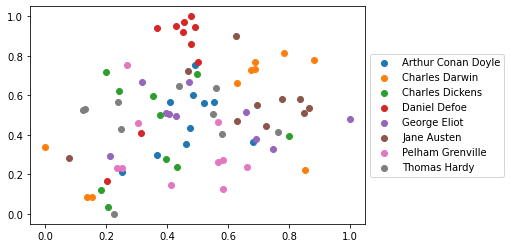

In [31]:
X = container_features[0]
visualize_tsne(X, labels)

# Normalize data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

# Classification

In [33]:
import classifierv2

In [34]:
iteration_score_container = [[] for _ in range(dimensions)]

In [35]:
for i in range(number_iterations):
    print('Init of iteration ' + str(i+1) + ' .......')
    limiar_scores = []
    for X in container_features:
        X = scaler.fit_transform(X)
        obj = classifierv2.Classification(X, y)
        scores = obj.classification()
        limiar_scores.append(scores)
    for index, score in enumerate(limiar_scores):
        iteration_score_container[index].append(score)
    print('End of iteration ' + str(i + 1) + ' .......')
    print('\n')

Init of iteration 1 .......
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 7 2 0 5 3 7 6 0 7 4 2 3]
Score 0.4375
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 7 5 2 0 6 1 7 1 0 5 3 5 1]
Score 0.5625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [0 0 0 5 4 2 0 0 1 5 1 0 5 3 5 7]
Score 0.375
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [6 0 0 7 5 2 4 2 3 7 1 0 5 3 5 3]
Score 0.5625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 4 2 0 5 7 4 6 5 4 4 4 0]
Score 0.3125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 0 1 7 1 0 5 3 5 4]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 3 7 4 2 0 5 7 4 6 3 4 4 4 3]
Score 0.3125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 4]
Score 0.5625
[5, 6, 0, 7, 4, 2, 6

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 0 4 7 6 2 0 4 3 5 7 5 5 4 5 1]
Score 0.375
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 6 2 0 5 3 7 5 0 5 4 3 1]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 6 2 0 5 3 7 5 0 5 4 3 1]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 7 2 0 2 7 4 3 3 0 7 3 4]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 3 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 2 3 5 1 0 5 4 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 3 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 2 3 5 1 0 5 4 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 2 3 5 1 0 5 4 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 3 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
End of iteration 4 .......


Init of iteration 5 .......
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 7 2 0 5 3 7 6 0 7 4 2 3]
Score 0.4375
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 7 5 2 0 6 1 7 1 0 5 3 5 1]
Score 0.5625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [0 0 0 5 4 2 0 0 1 5 1 0 5 3 5 7]
Score 0.375
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [6 0 0 7 5 2 4 2 3 7 1 0 5 3 5 3]
Score 0.5625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 4 2 0 5 7 4 6 5 4 4 4 0]
Score 0.3125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 0 1 7 1 0 5 3 5 4]
Sco

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 7 5 4 7 2 0 0 7 7 5 5 4 4 3 1]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 4]
Score 0.5625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 7 5 4 7 2 0 0 7 7 5 5 4 4 3 1]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 4]
Score 0.5625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 7 5 4 7 2 0 0 7 7 5 5 4 4 3 1]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 6 2 0 5 3 7 5 0 5 4 3 1]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 6 2 0 5 3 7 5 0 5 4 3 1]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 6 3 5 1 5 5 4 5 1]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 5 7 6 2 0 5 3 7 5 0 5 4 3 1]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 6 3 5 1 5 5 4 5 1]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 5 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 2 3 5 1 5 5 4 5 1]
Score 0.5625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 2 3 5 1 0 5 4 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 3 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 2 3 5 1 0 5 4 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 5 2 1 7 1 0 5 3 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 0 5 4 2 0 2 7 3 1 0 5 3 5 7]
Score 0.5
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 2 0 7 5 2 0 2 3 7 1 0 5 3 5 3]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 3 7 3 2 0 2 3 5 1 0 5 4 5 1]
Score 0.625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [5 7 

# Save Results

In [36]:
def join_lists(l1):
    str_res = ''
    for x in l1:
        str_res+= str(x) + ' '
    return str_res

In [37]:
print('\nFinal results:', text_partition)
file_result = open(output_file, 'w')
all_score = []
for index, it_score in enumerate(iteration_score_container):
    it_score = np.array(it_score)
    it_score = np.mean(it_score, axis=0)
    it_score = [round(i,2) for i in it_score]
    all_score += it_score
    str_result = join_lists(it_score)
    file_result.write(str_result+"\n")
    print(str_result)
file_result.close()


Final results: 3000
0.44 0.56 0.38 0.56 
0.31 0.5 0.5 0.62 
0.31 0.56 0.5 0.62 
0.31 0.56 0.5 0.62 
0.31 0.56 0.5 0.62 
0.25 0.56 0.5 0.62 
0.25 0.56 0.5 0.62 
0.25 0.62 0.5 0.62 
0.19 0.62 0.5 0.62 
0.38 0.62 0.5 0.62 
0.5 0.62 0.5 0.62 
0.5 0.62 0.5 0.62 
0.5 0.62 0.5 0.62 
0.56 0.62 0.5 0.62 
0.44 0.62 0.5 0.62 
0.25 0.62 0.5 0.62 
0.25 0.62 0.5 0.62 
0.62 0.62 0.5 0.62 
0.62 0.62 0.5 0.62 
0.62 0.62 0.5 0.62 
0.62 0.62 0.5 0.62 


In [38]:
max(all_score)

0.62